### The University of Melbourne, School of Computing and Information Systems
# COMP90086 Computer Vision, 2021 Semester 2

## Assignment 1

**Student Name:**    `Ankita Dhar`

**Student ID:**     `1154197`

This iPython notebook is a template which you should use for your Assignment 1 submission. This file should be submitted at the **Assignment 1: Code** link on the LMS, along with any images needed to run your code.

In addition to this file, you should submit a writren report explaining your results at the **Assignment 1: Report** link on the LMS. Please see the assignment specification for details on what must be included in the report for each question.

*Adding proper comments to your code is MANDATORY.*

### 1. Mapping between world and image coordinates
Note: Writing code for this question is optional. However, if you do not include code here you *must* show your computation steps in your written report.

### 2. Secret messages with bandpass filters

In [1]:
import os
import numpy as np
import cv2  
from matplotlib import pyplot as plt

In [2]:
# Gaussian Low or High Pass Filter

def GaussFilter(fourierImg, radius, gaussFilter):
    
    # creating a filter of the size of fourier transformed image
    width = fourierImg.shape[0]
    height = fourierImg.shape[1]
    mask = np.zeros((width, height))
    
    # finding centre of the filter
    centreX = np.floor(width/2)
    centreY = np.floor(height/2)
    
    for i in range(width):
        for j in range(height):
            # the value of the pixel in the filter is set based on:
            # 1. the distance of the pixel from the centre
            # 2. radius of the filter
            # 3. type of filter: high pass filter or low pass filter
            dis = np.sqrt((i - centreX)**2 + (j - centreY)**2)
            mask[i][j] = np.exp((-1)*dis**2/2/(radius**2))
            if ("high" == gaussFilter):
                mask[i][j] = 1 - mask[i][j]
            
    # masking image with high or low pass filter in fourier domain
    result = np.multiply(fourierImg, mask)
    
    # return the masked image and the mask
    return result,mask

In [3]:
# High and low spatial frequency thresholds
radiusLow = 125
radiusHigh = 125

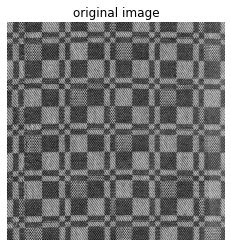

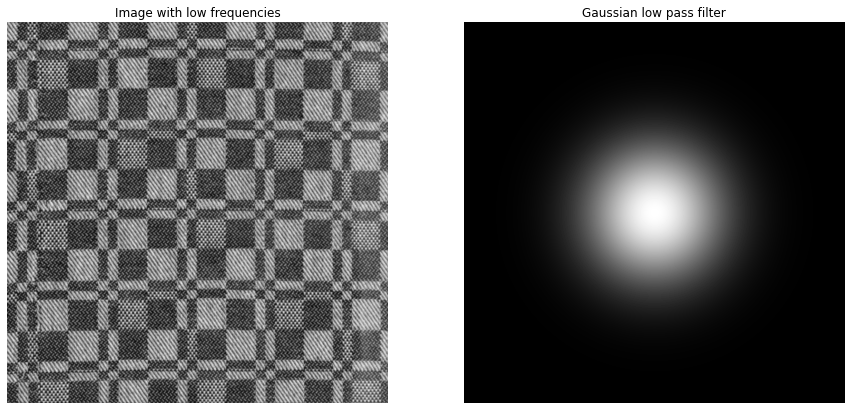

In [4]:
rootpath='./'
# reading the cover image
img = cv2.imread(os.path.join(rootpath, "cover_image.jpeg"),cv2.IMREAD_GRAYSCALE) 

# Fourier transform of the cover image
coverFourierImg = np.fft.fft2(img)
coverFourierImg = np.fft.fftshift(coverFourierImg)

coverFT, maskLow = GaussFilter(coverFourierImg,radiusLow,"low")

# Invert Fourier transform to get the filtered image

lowImage = np.real(np.fft.ifft2(np.fft.fftshift(coverFT)))

# displaying original image
plt.imshow(img ,cmap='gray')  
plt.title('original image')
plt.axis('off')
plt.show()

fig,axs = plt.subplots(1,2)

fig.set_figwidth(15)
fig.set_figheight(15)

# displaying image after masking high frequencies
plt.subplot(1,2,1)
plt.imshow(lowImage ,cmap='gray')  
plt.title('Image with low frequencies')
plt.axis('off')

# displaying the filter
plt.subplot(1,2,2)
plt.imshow(maskLow ,cmap='gray')  
plt.title('Gaussian low pass filter')
plt.axis('off')

plt.show()

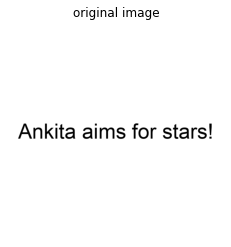

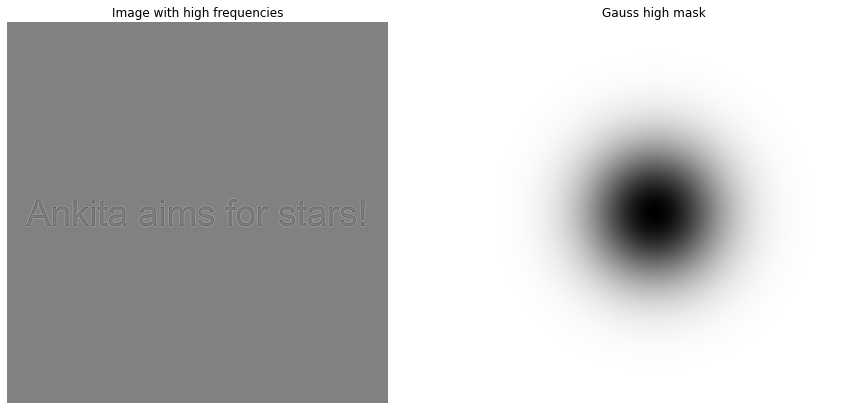

In [5]:
rootpath='./'
# reading the cover image
img = cv2.imread(os.path.join(rootpath, "secret_msg.jpeg"),cv2.IMREAD_GRAYSCALE) 

# Fourier transform of the secret message image
fourierImg = np.fft.fft2(img)
fourierImg = np.fft.fftshift(fourierImg)

secretFT, maskHigh = GaussFilter(fourierImg,radiusHigh,"high")

# Invert Fourier transform to get the filtered image

highImage = np.real(np.fft.ifft2(np.fft.fftshift(secretFT)))

# displaying original image
plt.imshow(img ,cmap='gray')  
plt.title('original image')
plt.axis('off')
plt.show()

fig,axs = plt.subplots(1,2)

fig.set_figwidth(15)
fig.set_figheight(15)

# displaying image after masking low frequencies
plt.subplot(1,2,1)
plt.imshow(highImage ,cmap='gray')  
plt.title('Image with high frequencies')
plt.axis('off')

# displaying the filter
plt.subplot(1,2,2)
plt.imshow(maskHigh ,cmap='gray')  
plt.title('Gauss high mask')
plt.axis('off')

plt.show()

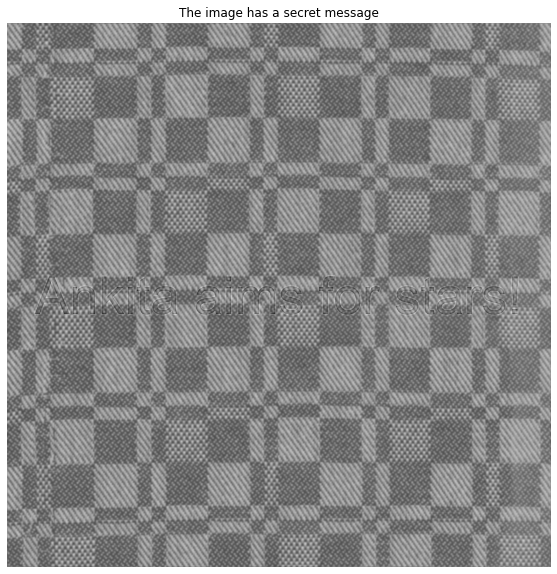

In [6]:
# adding cover to secret message image in fourier domain
hiddenMsgFT = np.add(coverFT, secretFT)

# Fourier domain to Spatial domain
hiddenMsgImg = np.real(np.fft.ifft2(np.fft.fftshift(hiddenMsgFT)))

# displaying the final image
fig, axs = plt.subplots(1, 1)
fig.set_figwidth(10)
fig.set_figheight(10)
plt.imshow(hiddenMsgImg ,cmap='gray')  
plt.title('The image has a secret message')
plt.axis('off')
plt.show()
